In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read in data
df = pd.read_csv('../data/diabetes.csv')
df[:15]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


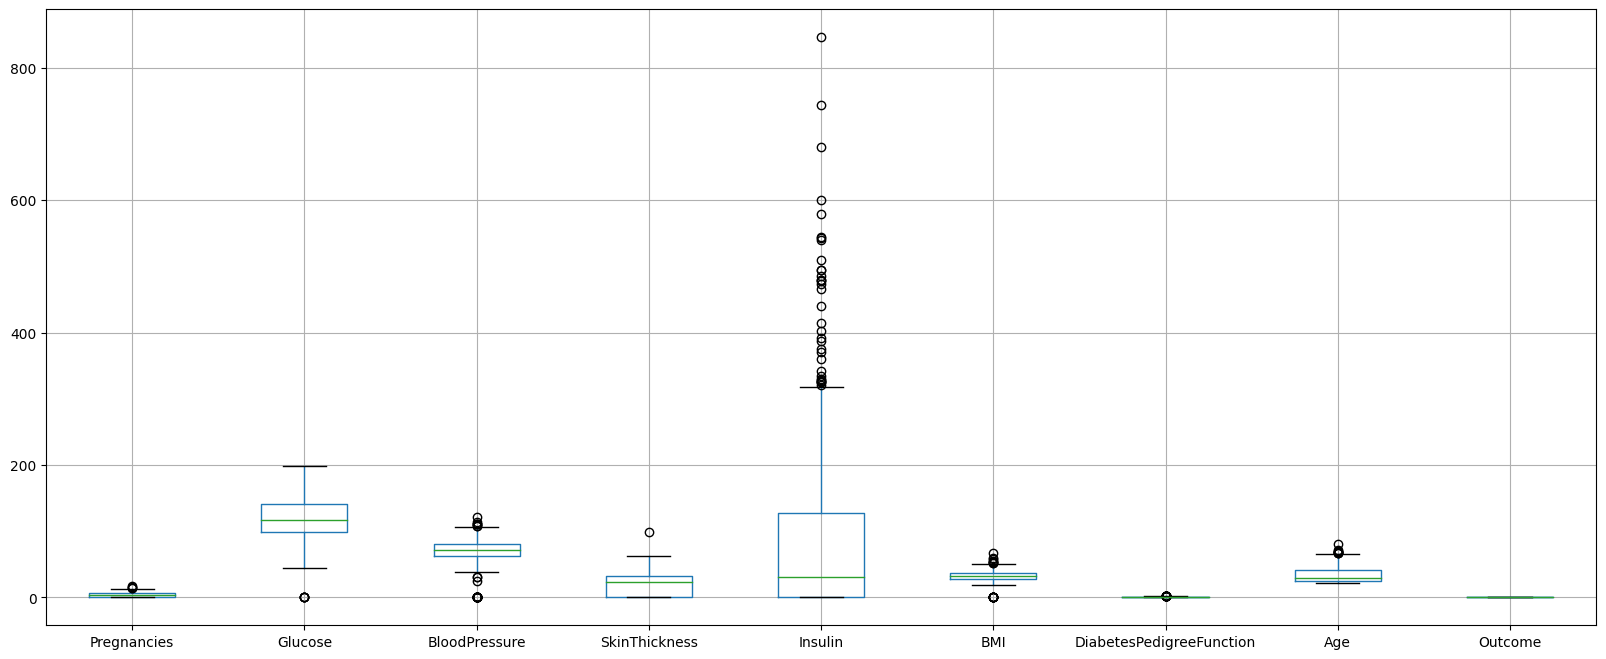

In [3]:
# Check for null values
df.isnull().sum()

# Check for duplicates
df.duplicated().sum()

# Check for outliers
df.boxplot(figsize=(20, 8))

# Check for correlations
df.corr() #no strong correlations


In [4]:
# Split the data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [5]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# convert the data into a numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [7]:
# reshape the y_train and y_test
y_train = y_train.reshape(-1, 1) # -1 means that it is an unknown dimension and we want numpy to figure it out
y_test = y_test.reshape(-1, 1) 

In [7]:
# train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression( solver='liblinear') #liblinear is a good solver for small datasets
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [9]:
# evaluate the model
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred) * 100

75.97402597402598

In [10]:
# save the model
model = pd.to_pickle(model, 'diabetes_model.pkl')

In [12]:
# load the model
model = pd.read_pickle('diabetes_model.pkl')

In [21]:
# Make a prediction
prediction = model.predict([[1, 137, 40, 35, 168, 43.1, 2.288, 33]])
print(*prediction) # 0 means no diabetes, 1 means diabetes

1
